In [ ]:
# Load and Clean Data
import os
print(os.getcwd())

/content/dsc-phase-1-project/dsc-phase-1-project/dsc-phase-1-project


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving imdb.title.ratings.csv.gz to imdb.title.ratings.csv.gz
Saving bom.movie_gross.csv to bom.movie_gross.csv
Saving title.basics.csv to title.basics.csv


In [ ]:
# Import required libraries
import pandas as pd
# Load CSV files from folder
bom = pd.read_csv('bom.movie_gross.csv')
basics = pd.read_csv('title.basics.csv')
# Load the gzip-compressed CSV directly
ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz', compression='gzip')

In [ ]:
#Quick look at the data
print("BOM shape:", bom.shape)
print("IMDB basics shape:", basics.shape)
print("Ratings shape:", ratings.shape)

BOM shape: (3387, 5)
IMDB basics shape: (146144, 6)
Ratings shape: (73856, 3)


In [ ]:
print(basics.columns.tolist())

['tconst', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres']


In [ ]:
print(ratings.columns.tolist())

['tconst', 'averagerating', 'numvotes']


In [ ]:
print(bom.columns.tolist())

['title', 'studio', 'domestic_gross', 'foreign_gross', 'year']


In [ ]:
#Clean the Data
# Drop rows with missing domestic gross
bom = bom.dropna(subset=['domestic_gross'])

# Clean and convert domestic gross to float
bom.loc[:, 'domestic_gross'] = bom['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)

# Print
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [ ]:
# Drop rows with missing year or genre
basics = basics.dropna(subset=['start_year', 'genres'])
basics


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [ ]:
# Drop rows with missing year or genre
basics = basics.dropna(subset=['start_year', 'genres'])
basics
# Convert startYear to numeric
basics['start_year'] = pd.to_numeric(basics['start_year'], errors='coerce')
basics = basics.dropna(subset=['start_year'])
# Rename columns for consistency
basics = basics.rename(columns={
    'primary_title': 'title'
})
# Print
basics.head()

,tconst,title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [ ]:
# Merge basics and ratings on tconst
df = pd.merge(basics, ratings, on='tconst', how='inner')
# Merge with box office data on title
df = pd.merge(df, bom, left_on='title', right_on='title', how='inner')
# Drop unused columns
df = df.drop(columns=['tconst'], errors='ignore')
# Rename for clarity
df = df.rename(columns={
    'start_year': 'year',
    'runtime_minutes': 'runtime',
    'averagerating': 'rating'
})

# Preview final dataset
print(df.shape)
df.head()


(2998, 11)


,title,original_title,year,runtime,genres,rating,numvotes,studio,domestic_gross,foreign_gross,year
0,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
1,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
3,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000,2014
4,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,"1,019.4",2015


In [ ]:
# Final shape and preview
print("Final merged dataset shape:", df.shape)
df.head()


Final merged dataset shape: (2998, 11)


,title,original_title,year,runtime,genres,rating,numvotes,studio,domestic_gross,foreign_gross,year
0,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
1,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
3,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000,2014
4,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,"1,019.4",2015


In [ ]:
#Understand the Dataset
df.info()
df.describe(include='all')
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2998 non-null   object 
 1   original_title  2998 non-null   object 
 2   year            2998 non-null   int64  
 3   runtime         2953 non-null   float64
 4   genres          2998 non-null   object 
 5   rating          2998 non-null   float64
 6   numvotes        2998 non-null   int64  
 7   studio          2997 non-null   object 
 8   domestic_gross  2998 non-null   float64
 9   foreign_gross   1803 non-null   object 
 10  year            2998 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 257.8+ KB


,title,original_title,year,runtime,genres,rating,numvotes,studio,domestic_gross,foreign_gross,year
0,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
1,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
3,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000,2014
4,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,"1,019.4",2015


In [ ]:
# Drop rows with missing runtime, studio, or domestic gross
df = df.dropna(subset=['runtime', 'studio', 'domestic_gross'])
# Fill foreign gross with 0
df['foreign_gross'] = df['foreign_gross'].fillna(0)
#Check for missing values
df.isnull().sum()
#Understand the Dataset
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
Index: 2952 entries, 0 to 2997
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2952 non-null   object 
 1   original_title  2952 non-null   object 
 2   year            2952 non-null   int64  
 3   runtime         2952 non-null   float64
 4   genres          2952 non-null   object 
 5   rating          2952 non-null   float64
 6   numvotes        2952 non-null   int64  
 7   studio          2952 non-null   object 
 8   domestic_gross  2952 non-null   float64
 9   foreign_gross   2952 non-null   object 
 10  year            2952 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 276.8+ KB


/tmp/ipython-input-885001939.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['foreign_gross'] = df['foreign_gross'].fillna(0)


,title,original_title,year,runtime,genres,rating,numvotes,studio,domestic_gross,foreign_gross,year
count,2952,2952,2952.000000,2952.000000,2952,2952.000000,2.952000e+03,2952,2.952000e+03,2952.0,2952.000000
unique,2580,2699,NaN,NaN,317,NaN,NaN,215,NaN,1000.0,NaN
top,One Day,Eden,NaN,NaN,Drama,NaN,NaN,Uni.,NaN,0.0,NaN
freq,6,6,NaN,NaN,301,NaN,NaN,153,NaN,1185.0,NaN
mean,NaN,NaN,2013.797764,107.305894,NaN,6.464837,6.319074e+04,NaN,3.068027e+07,NaN,2014.089092
std,NaN,NaN,2.458484,20.043335,NaN,0.994953,1.267370e+05,NaN,6.708970e+07,NaN,2.442117
min,NaN,NaN,2010.000000,3.000000,NaN,1.600000,5.000000e+00,NaN,1.000000e+02,NaN,2010.000000
25%,NaN,NaN,2012.000000,94.000000,NaN,5.900000,2.500500e+03,NaN,1.367500e+05,NaN,2012.000000
50%,NaN,NaN,2014.000000,105.000000,NaN,6.600000,1.387750e+04,NaN,2.000000e+06,NaN,2014.000000
75%,NaN,NaN,2016.000000,118.000000,NaN,7.100000,6.666950e+04,NaN,3.242500e+07,NaN,2016.000000


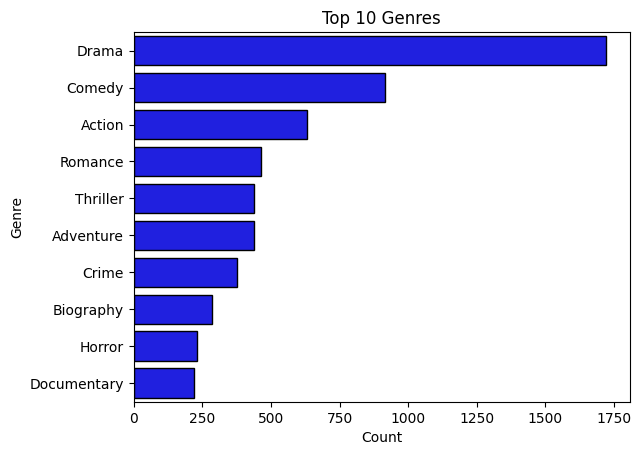

In [ ]:
#Visualizations - Top 10 Genres
import seaborn as sns
import matplotlib.pyplot as plt

top_genres = df['genres'].str.split(',').explode().value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, color = '#0000FF',edgecolor = "black")
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()
#Genre Popularity
#The most common genres across the dataset are Drama, Comedy, and Action
#Microsoft Studios should prioritize producing content in high-frequency genres

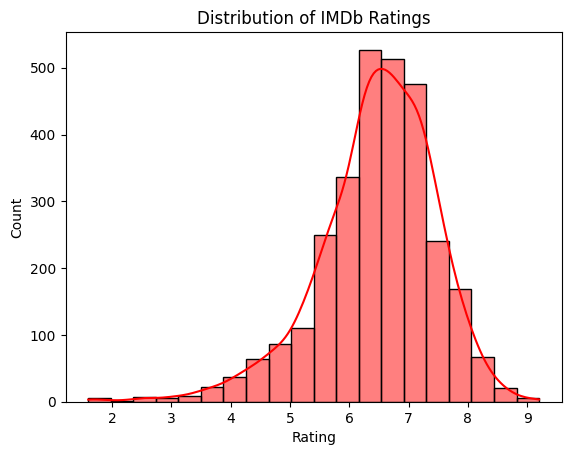

In [ ]:
#Distribution of IMDb Ratings
sns.histplot(df['rating'], bins=20, kde=True, color = '#FF0000',edgecolor = "black")
plt.title('Distribution of IMDb Ratings')
plt.xlabel('Rating')
plt.show()
#Most films achieve moderate critical reception
#Aim for quality projects

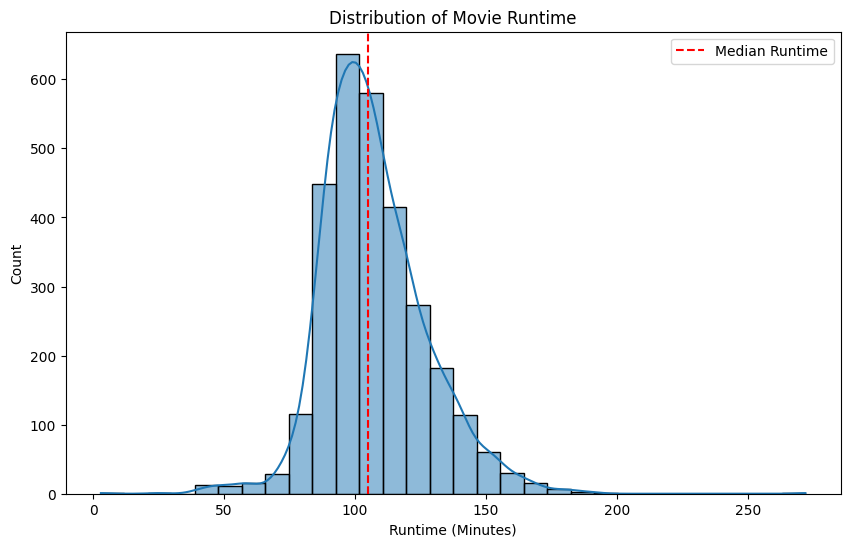

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='runtime', bins=30, kde=True)
plt.title('Distribution of Movie Runtime')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Count')
plt.axvline(df['runtime'].median(), color='red', linestyle='--', label='Median Runtime')
plt.legend()
plt.show()

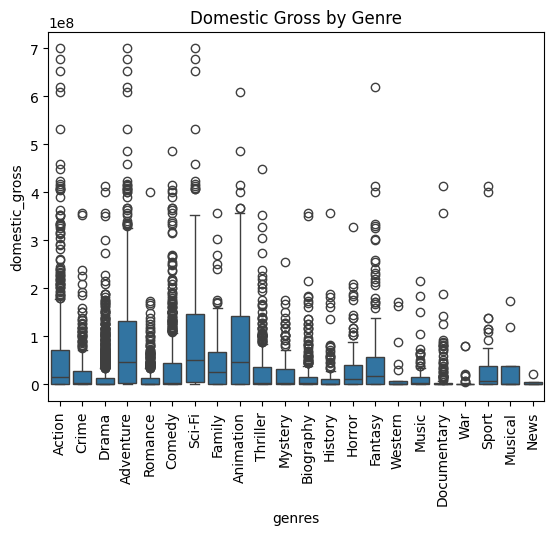

In [ ]:
#Box Office Gross by Genre
df_exploded = df.copy()
# Drop one of the duplicate 'year' columns before exploding
df_exploded = df_exploded.loc[:,~df_exploded.columns.duplicated()]
df_exploded['genres'] = df_exploded['genres'].str.split(',')
df_exploded = df_exploded.explode('genres')

sns.boxplot(x='genres', y='domestic_gross', data=df_exploded)
plt.xticks(rotation=90)
plt.title('Domestic Gross by Genre')
plt.show()
#SciFi, Adventure, Animation, and Action movies in these genres tend to perform better financially
#Sci-Fi, Action, and Adventure have the most number, with films grossing over $500 million and even some approaching $700 million

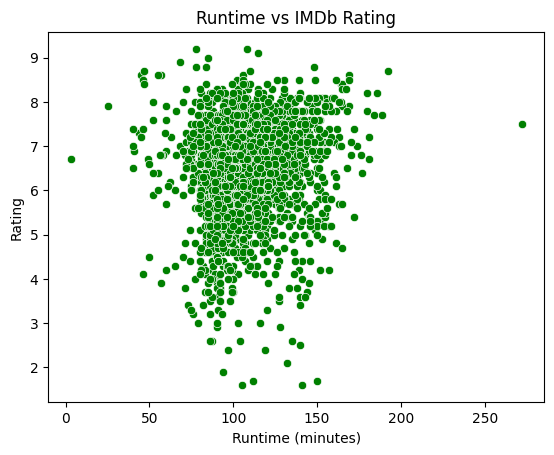

In [ ]:
#Runtime vs. Average Rating
sns.scatterplot(x='runtime', y='rating', data=df, color = '#008000')
plt.title('Runtime vs IMDb Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Rating')
plt.show()
#No strong linear correlation between a movie's runtime and its IMDb rating

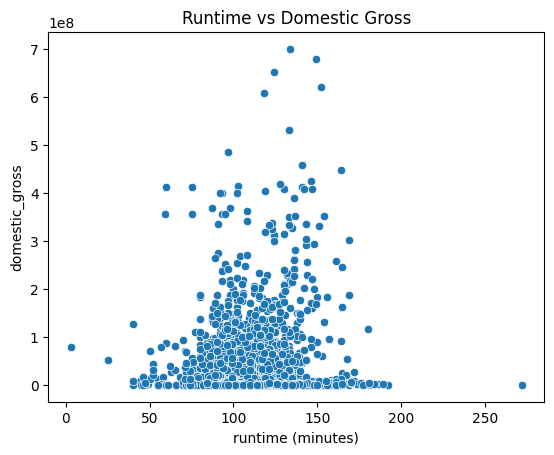

In [ ]:
#Runtime vs. Gross
sns.scatterplot(x='runtime', y='domestic_gross', data=df)
plt.title('Runtime vs Domestic Gross')
plt.xlabel('runtime (minutes)')
plt.ylabel('domestic_gross')
plt.show()
#No strong linear correlation between a movie's runtime and its Domestic Gross

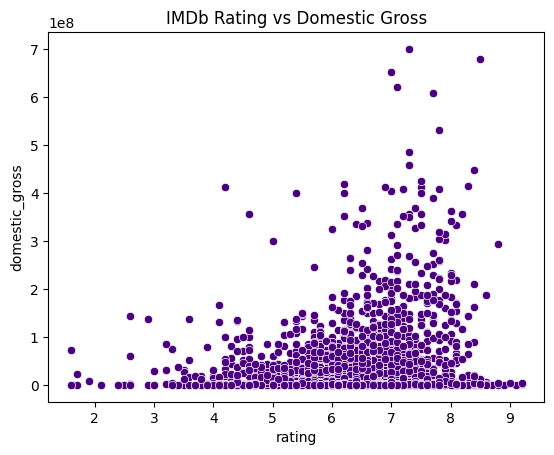

In [ ]:
#Runtime vs. Gross
sns.scatterplot(x='rating', y='domestic_gross', data=df, color = "#4B0082")
plt.title('IMDb Rating vs Domestic Gross')
plt.xlabel('rating')
plt.ylabel('domestic_gross')
plt.show()
#No direct cause-and-effect relationship between a movie's rating and its domestic gross

                  rating  numvotes   runtime  domestic_gross
rating          1.000000  0.284161  0.149447        0.122045
numvotes        0.284161  1.000000  0.259870        0.667754
runtime         0.149447  0.259870  1.000000        0.127385
domestic_gross  0.122045  0.667754  0.127385        1.000000


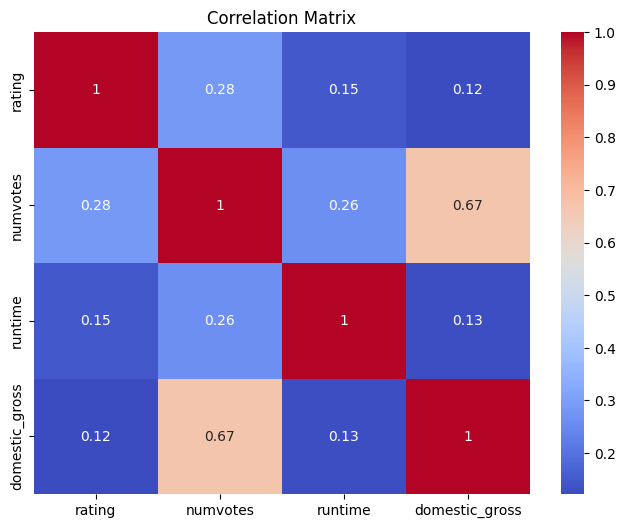

In [ ]:
matrix_df = df[['rating', 'numvotes', 'runtime', 'domestic_gross']]

# Compute correlation matrix
correlation_matrix = matrix_df.corr()
print(correlation_matrix)
# Visualize
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

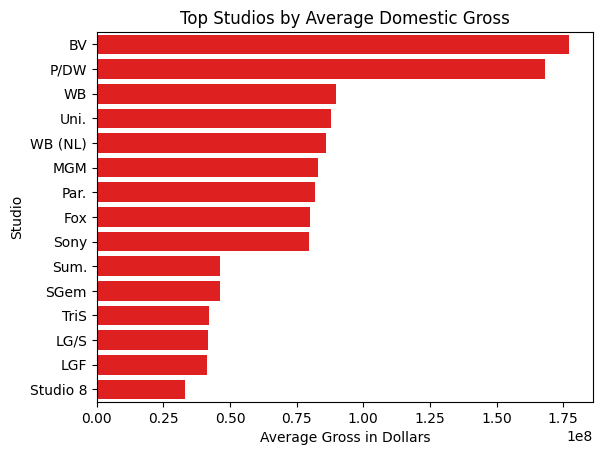

In [ ]:
studio_avg = df.groupby('studio')['domestic_gross'].mean().sort_values(ascending=False).head(15)

sns.barplot(x=studio_avg.values, y=studio_avg.index, color = "#FF0000")
plt.title('Top Studios by Average Domestic Gross')
plt.xlabel('Average Gross in Dollars')
plt.ylabel('Studio')
plt.show()
#Buena Vista and Paramount/DreamWorks have a distinct advantage in average box office performance